In [ ]:
# Code written by: Michael Bramble | michael.s.bramble@jpl.nasa.gov
# testing the process for loading unmixing endmembers for EMIT AMD investigation
# 20240124 - initial version

import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

In [ ]:
# RELAB
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/jarosite/c1jb709.txt'
df_c1jb709 = pd.read_csv(file,header=0,skiprows=2,delimiter="\t",usecols=[0, 1],names=["wavelength","reflectance"])

In [ ]:
# load EMIT wavelengths
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/emit_wavelengths.txt'
wavelengths_emit_nm = pd.read_csv(file,header=None)
wavelengths_emit_um = wavelengths_emit[0]/1000

In [ ]:
# resample wavelengths - linear interpolation 

x = df_c1jb709['wavelength'] # LAB WAVELENGTHS
y = df_c1jb709['reflectance'] # LAB REFLECTANCE
xnew = wavelengths_emit_um # EMIT WAVELENGTHS
ynew = np.interp(xnew, x, y) # LAB RESAMPLED TO EMIT

# # simplified into fewer lines
# ynew = np.interp(wavelengths_emit_um, df_c1jb709['wavelength'], df_c1jb709['reflectance'])

plt.plot(x, y, '+', label='lab data')
plt.plot(xnew, ynew, label='EMIT interp')
plt.title('linear interpolation - RELAB jarosite')
plt.legend(loc='best')
plt.axis((1.8, 2.0, 0.7, 0.86))
plt.show()

In [ ]:
# resample wavelengths - cubic spline

x = df_c1jb709['wavelength'] # LAB WAVELENGTHS
y = df_c1jb709['reflectance'] # LAB REFLECTANCE
spl = CubicSpline(x, y)
xnew = wavelengths_emit_um # EMIT WAVELENGTHS
ynew = spl(xnew) # LAB RESAMPLED TO EMIT

# # simplified into fewer lines
# spl = CubicSpline(df_c1jb709['wavelength'], df_c1jb709['reflectance'])
# ynew = spl(wavelengths_emit_um) # LAB RESAMPLED TO EMIT

plt.plot(x, y, '+', label='lab data')
plt.plot(xnew, ynew, label='EMIT interp')
plt.legend(loc='best')
plt.title('cubic spline interpolation - RELAB jarosite')
plt.axis((1.8, 2.0, 0.7, 0.86))
plt.show()

In [26]:
# USGS

# wavelengths
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Wavelengths_BECK_Beckman_0.2-3.0_microns.txt'
df_usgs_beck = pd.read_csv(file,header=None,skiprows=1,names=["wavelength"])

file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt'
df_usgs_asd = pd.read_csv(file,header=None,skiprows=1,names=["wavelength"])

# schwertmannite
file = '/Users/bramble/My Drive/_JPL_AMD/endmembers/usgs/splib07a_Schwertmannite_BZ93-1_BECKb_AREF.txt'
df_schwertmannite_BZ93_1 = pd.read_csv(file,header=None,skiprows=1,names=["reflectance"])



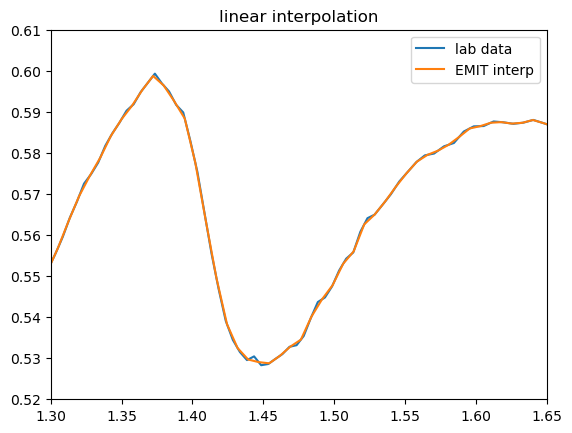

In [45]:
# USGS - linear interpolation

y_schwertmannite_BZ93_1 = np.interp(wavelengths_emit_um, df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance']) # LAB RESAMPLED TO EMIT

plt.plot(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'], label='lab data')
plt.plot(wavelengths_emit_um, y_schwertmannite_BZ93_1, label='EMIT interp')
plt.legend(loc='best')
plt.title('linear interpolation - USGS schwertmannite')
plt.axis((1.3, 1.65, 0.52, 0.61))
# plt.axis((0.1, 3, 0, 1))
plt.show()


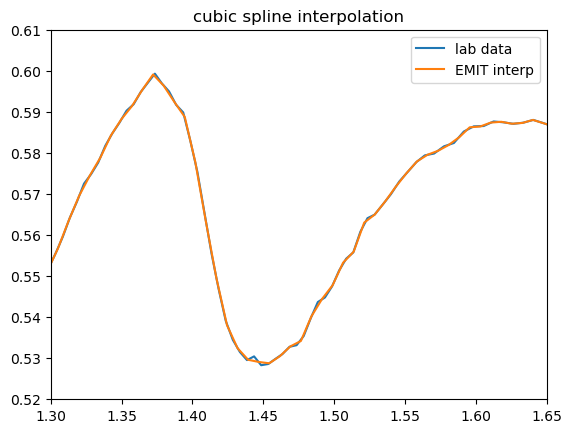

In [43]:
# USGS - cubic spline interpolation
# NOTE THE DIFFERENCE NEEDED TO REPLACE THE NO DATA VALUE (-1.23e+34)

# df_schwertmannite_BZ93_1['reflectance'] =  df_schwertmannite_BZ93_1['reflectance'].mask(df_schwertmannite_BZ93_1['reflectance'] < 0)
# df_schwertmannite_BZ93_1.replace(-1.23e+34,0)

spl = CubicSpline(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'].replace(-1.23e+34,0))
y_schwertmannite_BZ93_1 = spl(wavelengths_emit_um)

plt.plot(df_usgs_beck['wavelength'], df_schwertmannite_BZ93_1['reflectance'], label='lab data')
plt.plot(wavelengths_emit_um, y_schwertmannite_BZ93_1, label='EMIT interp')
plt.legend(loc='best')
plt.title('cubic spline interpolation - USGS schwertmannite')
plt.axis((1.3, 1.65, 0.52, 0.61))
# plt.axis((0.1, 3, 0, 1))
plt.show()


In [32]:
# min(df_schwertmannite_BZ93_1.replace(-1.23e+34,0)
min(df_schwertmannite_BZ93_1['reflectance'].replace(-1.23e+34,0))


0.0